<a href="https://colab.research.google.com/github/mlin3happy/ML-Learning/blob/main/Diabetes_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV, learning_curve, validation_curve, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import svm



# **Decision Tree with Pruning**

In [ ]:
#  Decision Tree with pruning
# source code:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv", delimiter=",")
df.head()
df.describe(include="all").loc['std']





Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
Name: std, dtype: float64

(576, 8)
(192, 8)


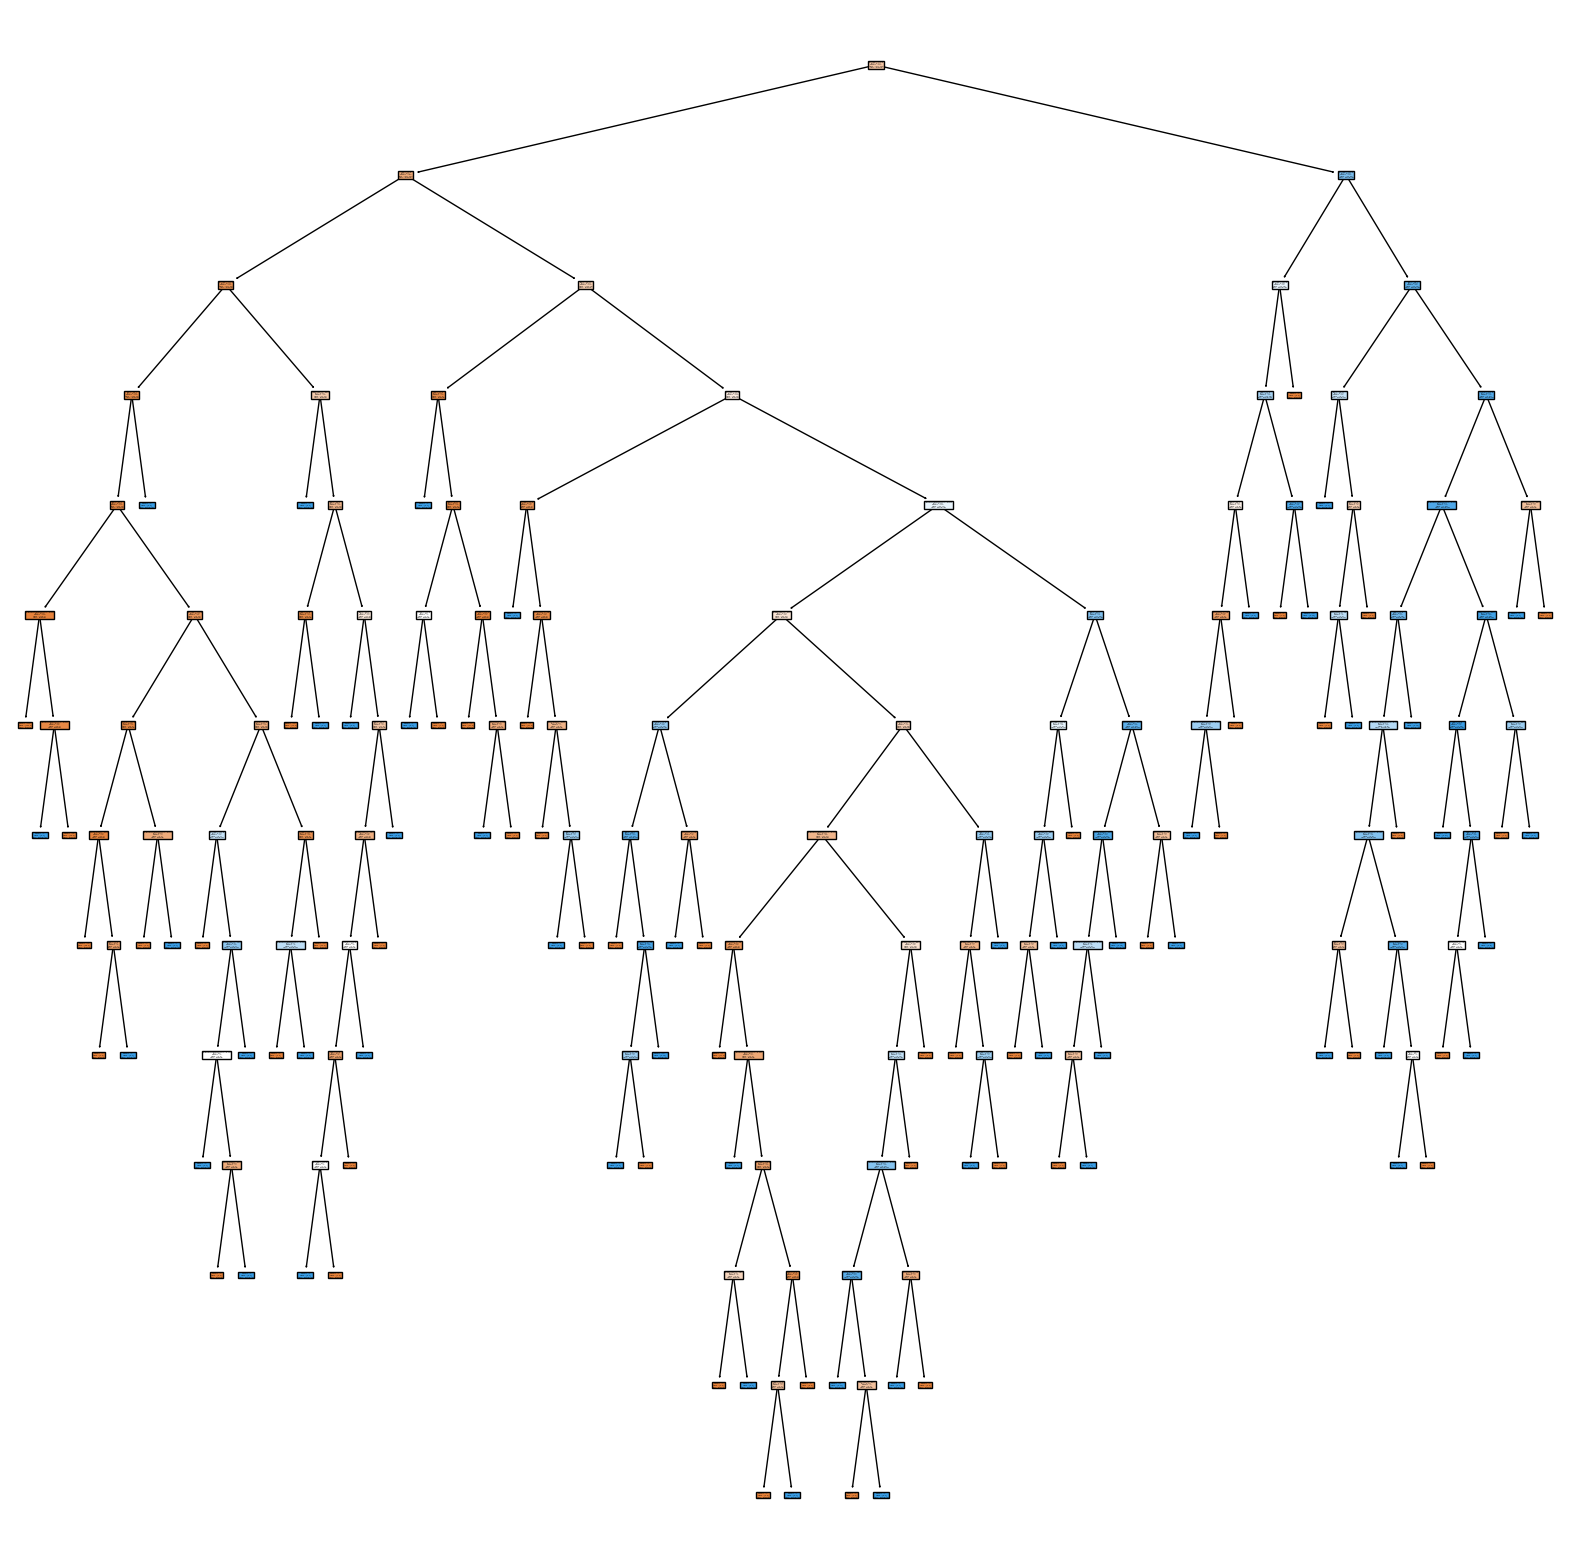

Train score 1.0
Test score 0.7083333333333334
Cross Validation Score 0.7163059163059163


In [ ]:
df.dropna(inplace=True)
X=df.drop(columns=['Outcome'])
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
_tree=tree.DecisionTreeClassifier(random_state=42)
_tree.fit(x_train,y_train)
y_train_prediction=_tree.predict(x_train)
y_test_prediction=_tree.predict(x_test)
plt.figure(figsize=(20,20))
features=df.columns
classes=['Diabetes','No Diabetes']
tree.plot_tree(_tree, feature_names=features, class_names=classes, filled=True)
plt.show()
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(_tree,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')




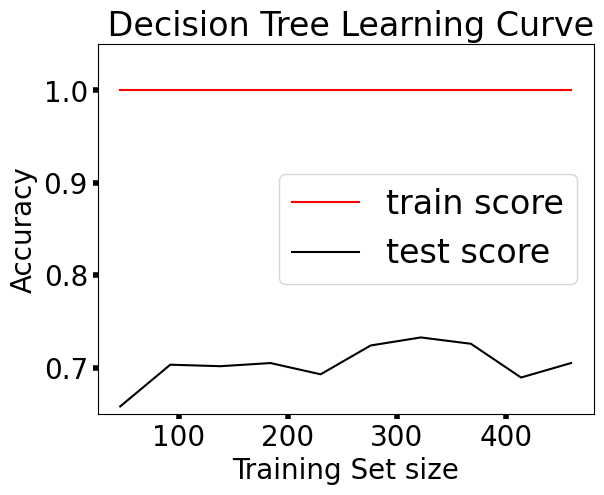

In [ ]:
import matplotlib

train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(_tree, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
plt.figure()
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" Decision Tree Learning Curve",fontsize=24)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.ylim(0.65,1.05)
plt.show()


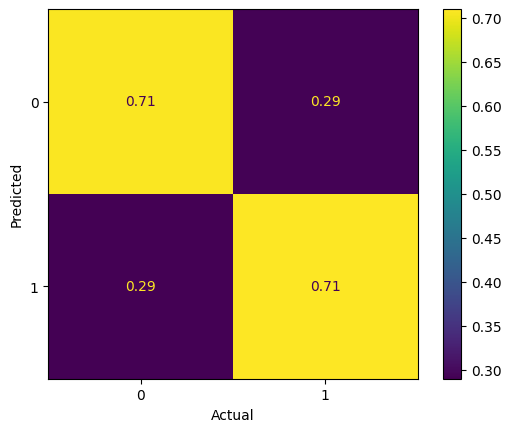

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       123
           1       0.58      0.71      0.64        69

    accuracy                           0.71       192
   macro avg       0.69      0.71      0.70       192
weighted avg       0.73      0.71      0.71       192



In [ ]:
predictions=_tree.predict(x_test)
cm=confusion_matrix(y_test,predictions, labels=_tree.classes_, normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=_tree.classes_)
disp.plot()
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show(block=False)
print(classification_report(y_test,predictions))


<Figure size 640x480 with 0 Axes>

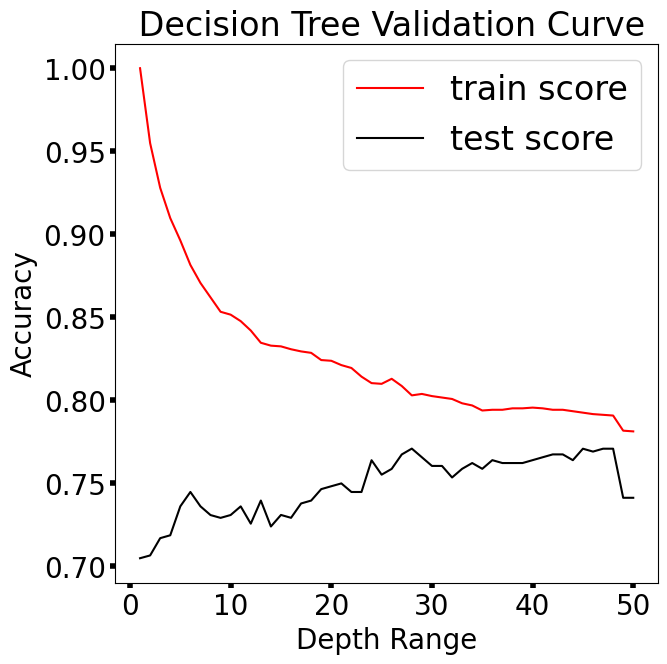

In [ ]:

#source code
#https://scikit-learn.org/stable/modules/learning_curve.html
depth_range=np.arange(50)+1
train_score, valid_score=validation_curve(_tree, x_train, y_train, param_name="min_samples_leaf", param_range=depth_range, cv=5, n_jobs=4, scoring='accuracy')
plt.figure()
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
plt.subplots(1,figsize=(7,7))
plt.plot(depth_range, train_score_mean, label="train score", color="red")
plt.plot(depth_range, test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" Decision Tree Validation Curve",fontsize=24)
plt.xlabel("Depth Range",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()




best estimator DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
Train score 0.8038194444444444
Test score 0.6927083333333334
Cross Validation Score 0.7318139376962906


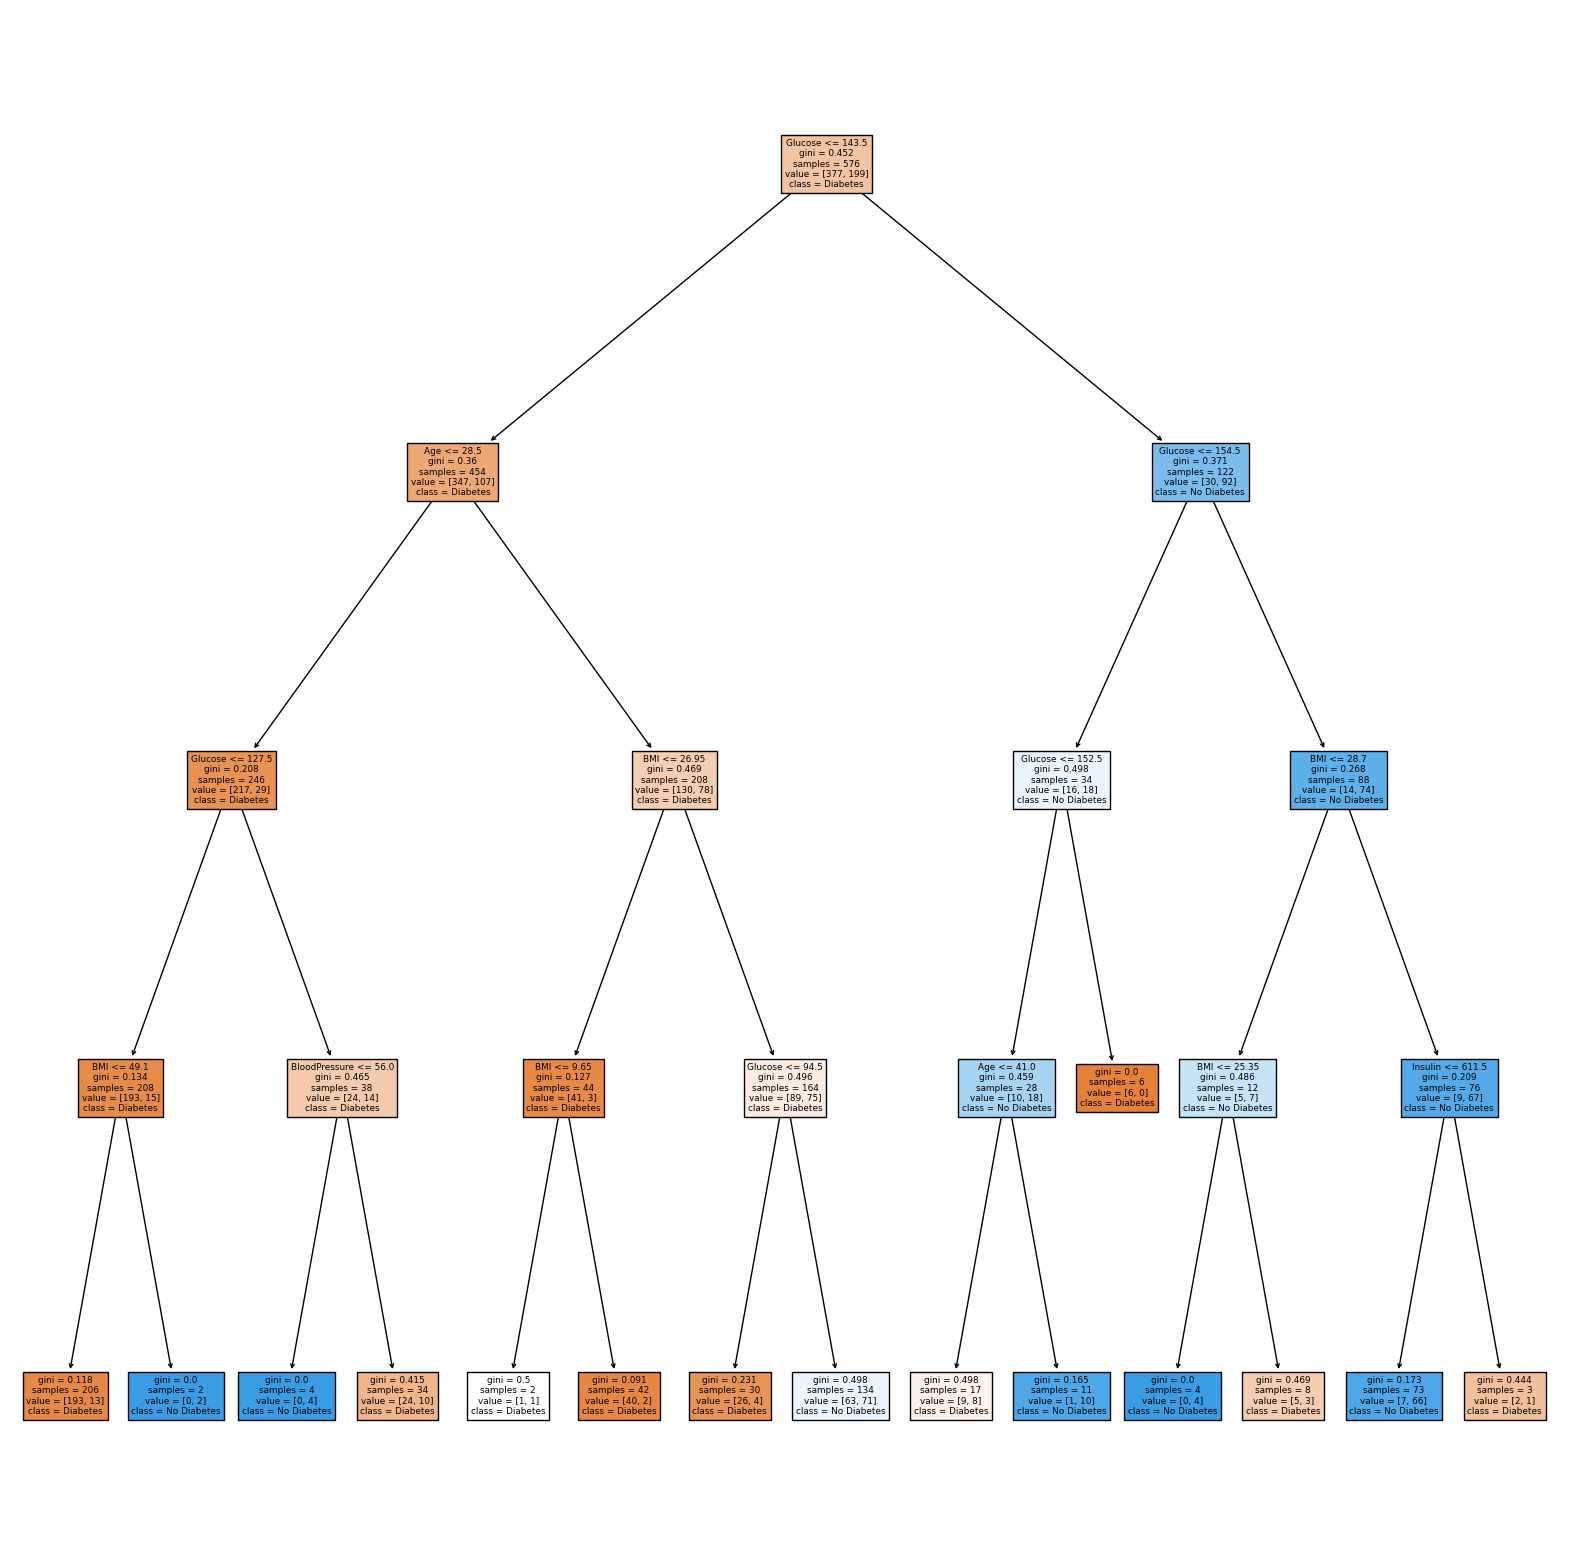

In [ ]:
from joblib import dump,load
params={'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40],
        'min_samples_split':[2,3,4],
        'min_samples_leaf':[1,2]}
_tree=tree.DecisionTreeClassifier()
gcv=GridSearchCV(estimator=_tree, param_grid=params,refit=True)
gcv.fit(x_train, y_train)
model=gcv.best_estimator_
dump(model,"model.joblib")
estimator=load("model.joblib")
print("best estimator",estimator)
model.fit(x_train,y_train)
y_train_prediction=model.predict(x_train)
y_test_prediction=model.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(model,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')
plt.figure(figsize=(20,20))
features=df.columns
classes=['Diabetes','No Diabetes']
tree.plot_tree(model, feature_names=features, class_names=classes, filled=True)
plt.show()


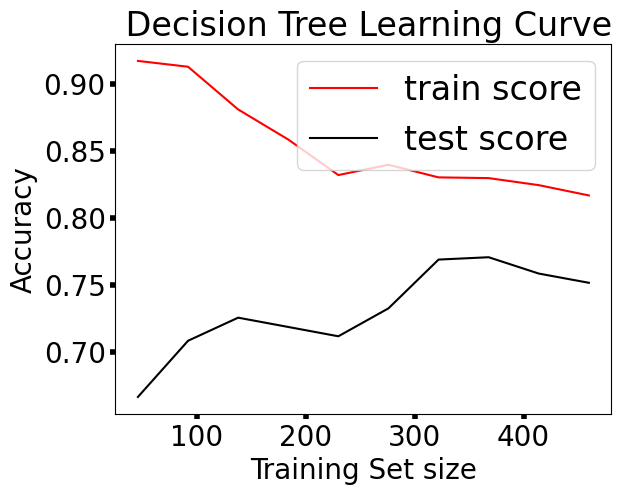

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(model, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
plt.figure()
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" Decision Tree Learning Curve",fontsize=24)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

best alpha for testing data 0.006741522366522364


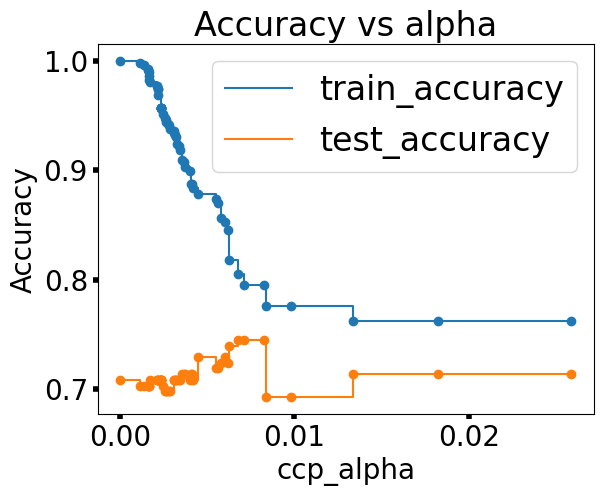

In [ ]:
path=_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# print(ccp_alphas)
scores=[]
_tree_list=[]
for ccp_alpha in ccp_alphas:
  _tree=tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
  _tree.fit(x_train, y_train)
  _tree_list.append(_tree)
_tree_list=_tree_list[:-1]
ccp_alphas=ccp_alphas[:-1]

train_acc=[]
test_acc=[]
for c in _tree_list:
  y_train_prediction=c.predict(x_train)
  y_test_prediction=c.predict(x_test)
  train_acc.append(accuracy_score(y_train_prediction, y_train))
  test_acc.append(accuracy_score(y_test_prediction, y_test))
best_test_index=np.argmax(test_acc)
best_test_alpha=ccp_alphas[best_test_index]
print("best alpha for testing data",best_test_alpha)
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label='train_accuracy', drawstyle='steps-post')
plt.plot(ccp_alphas, test_acc, label='test_accuracy', drawstyle='steps-post')
plt.legend(fontsize=24)
plt.title('Accuracy vs alpha',fontsize=24)
plt.xlabel("ccp_alpha",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()



Train score 0.8055555555555556
Test score 0.7447916666666666
Cross Validation Score 0.7422459893048128


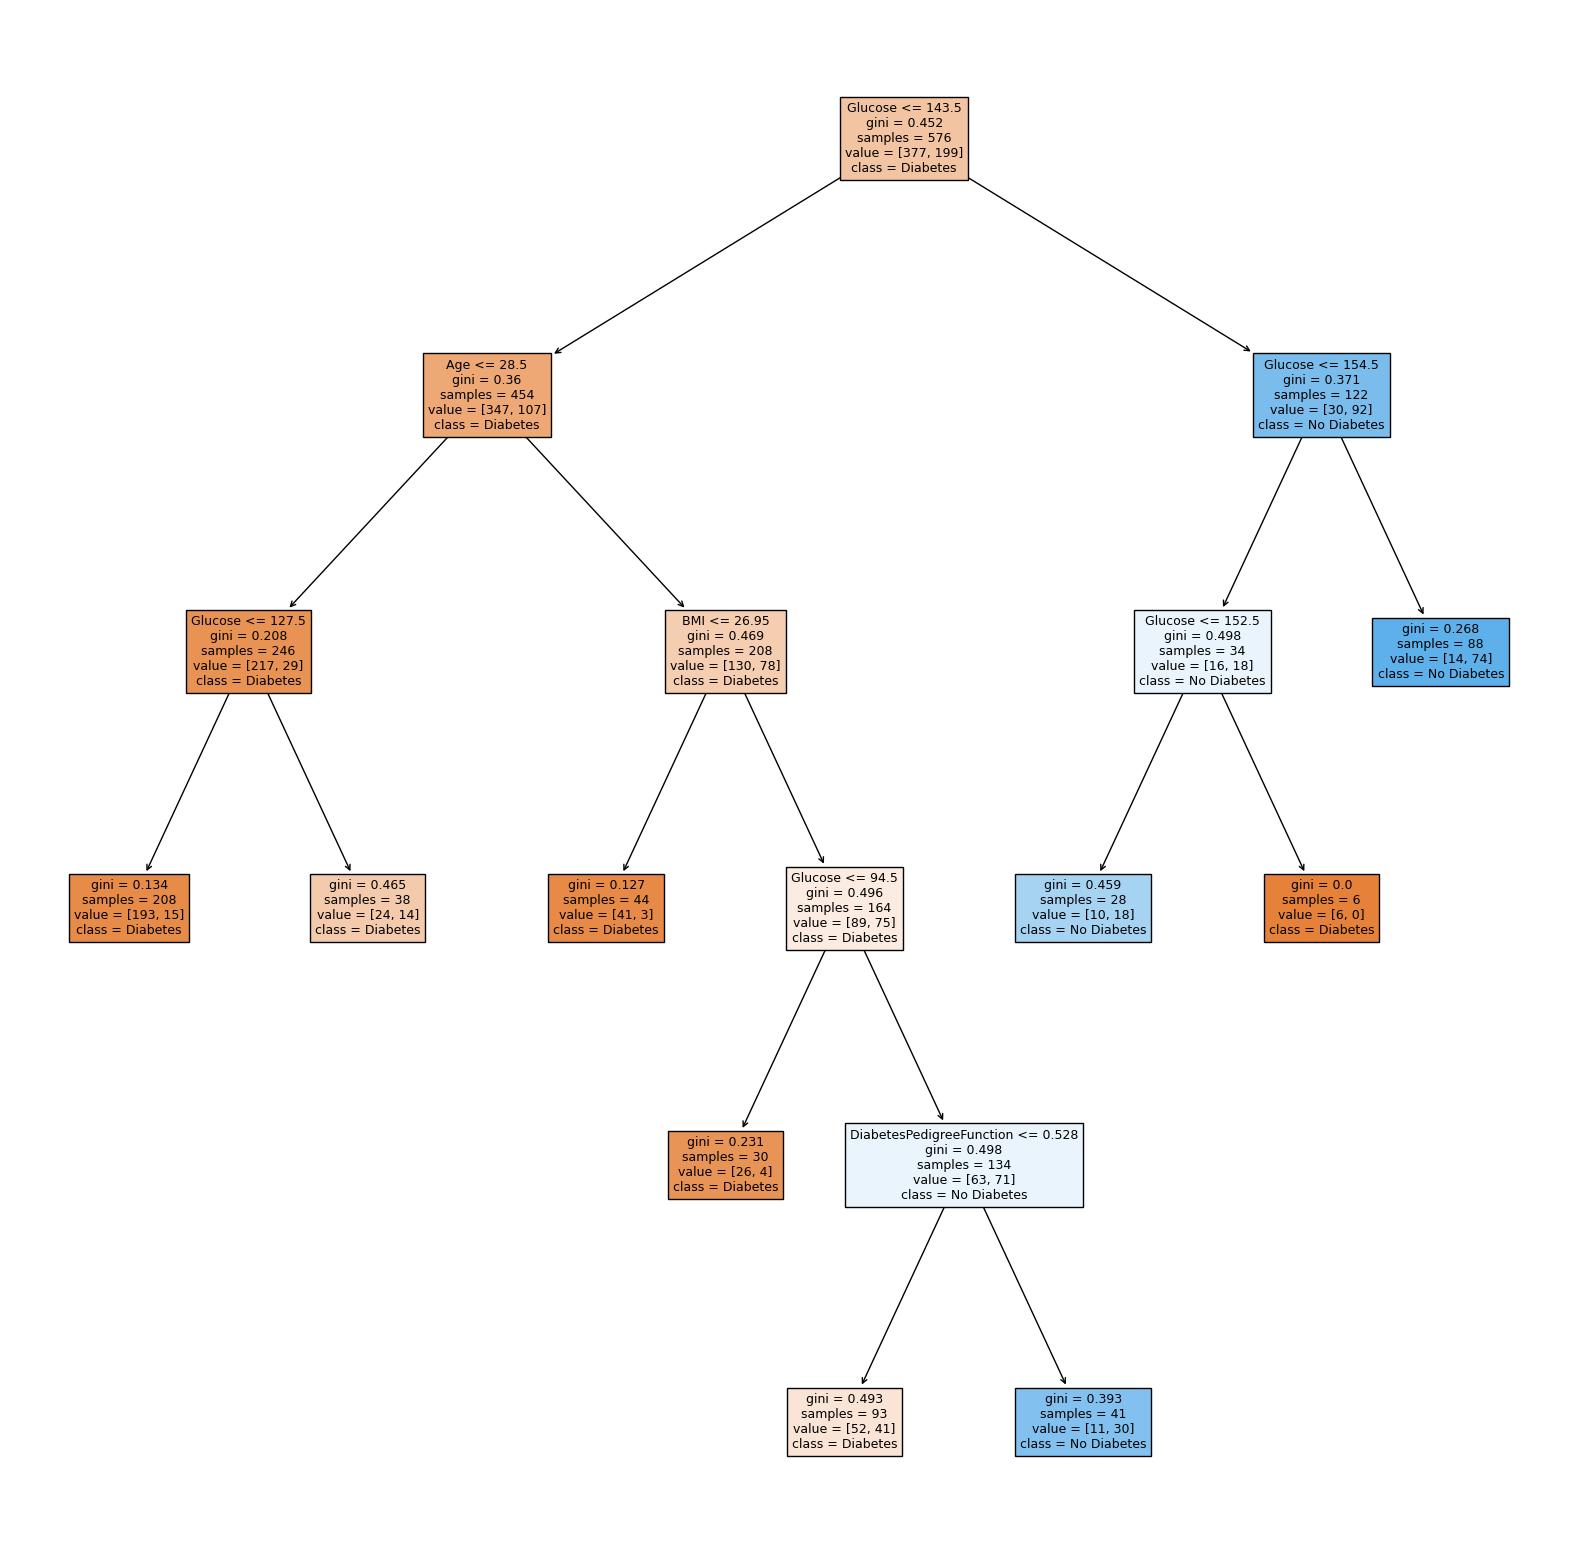

In [ ]:
_tree_=tree.DecisionTreeClassifier(random_state=0, ccp_alpha=best_test_alpha)
_tree_.fit(x_train, y_train)
y_train_prediction = _tree_.predict(x_train)
y_test_prediction=_tree_.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(_tree_,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

plt.figure(figsize=(20,20))
features=df.columns
classes=['Diabetes','No Diabetes']
tree.plot_tree(_tree_, feature_names=features, class_names=classes, filled=True)
plt.show()



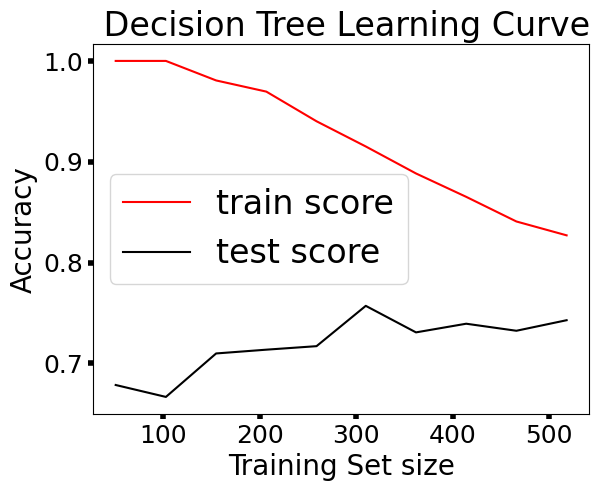

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(_tree_, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
train_score_mean=np.mean(train_score, axis=1)
dt_test_score_mean=np.mean(valid_score, axis=1)
dt_fit_score_mean=np.mean(fit_times, axis=1)
plt.figure()
plt.plot( train_sizes,train_score_mean, label="train score", color="red")
plt.plot( train_sizes,dt_test_score_mean, label="test score", color="black")
plt.legend(fontsize=24)
plt.title(" Decision Tree Learning Curve",fontsize=24)
plt.xlabel("Training Set size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=18,width=4)
plt.show()

# **Neural Network**

Accuracy for Neural Network is 70.3125
Confusion Matrix: [[84 39]
 [18 51]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       377
           1       0.59      0.71      0.64       199

    accuracy                           0.73       576
   macro avg       0.71      0.72      0.71       576
weighted avg       0.75      0.73      0.73       576



<Figure size 640x480 with 0 Axes>

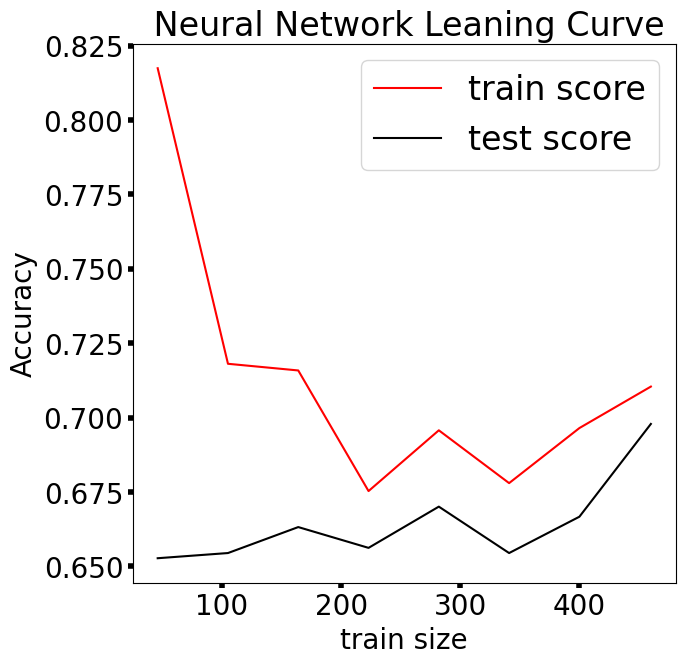

Train score 0.7291666666666666
Test score 0.703125
Cross Validation Score 0.7318139376962906


In [ ]:
NN=MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', learning_rate='adaptive', learning_rate_init=0.05, validation_fraction=0.1, random_state=42)
NN.fit(x_train, y_train)
predict_train=NN.predict(x_train)
predict_test=NN.predict(x_test)
accuracy=accuracy_score(y_test, predict_test)*100
confusion_mat = confusion_matrix(y_test, predict_test)
print("Accuracy for Neural Network is", accuracy)
print("Confusion Matrix:", confusion_mat)
print(classification_report(y_train, predict_train))

train_sizes=np.linspace(0.1,1.0,8)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(NN, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
plt.figure()
train_score_mean=train_score.mean(axis=1)
test_score_mean=valid_score.mean(axis=1)

plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best", fontsize=24)
plt.title(" Neural Network Leaning Curve", fontsize=24)
plt.xlabel("train size", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()
print(f'Train score {accuracy_score(predict_train,y_train)}')
print(f'Test score {accuracy_score(predict_test,y_test)}')
cross_validation_score=cross_val_score(model,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

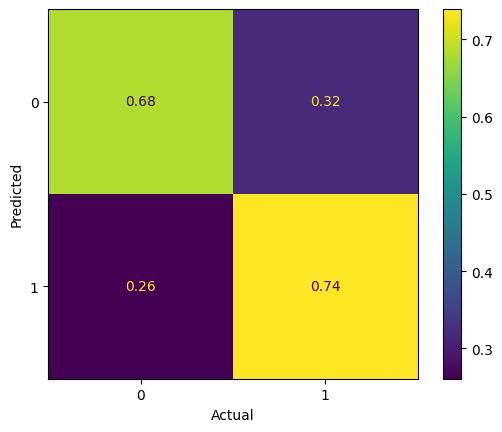

              precision    recall  f1-score   support

           0       0.82      0.68      0.75       123
           1       0.57      0.74      0.64        69

    accuracy                           0.70       192
   macro avg       0.70      0.71      0.69       192
weighted avg       0.73      0.70      0.71       192



In [ ]:
predictions=NN.predict(x_test)
cm=confusion_matrix(y_test,predictions, labels=NN.classes_, normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NN.classes_)
disp.plot()
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show(block=False)
print(classification_report(y_test,predictions))


best number hidden layer 6


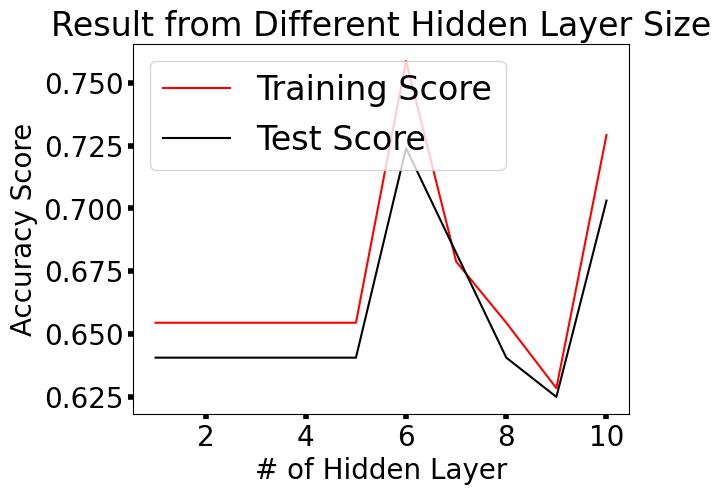

In [ ]:
# figure out the hiddel layber for best result
from sklearn.metrics import f1_score
hsize=[1,2,3,4,5,6,7,8,9,10]
train_score=[]
test_score=[]
f1_test=[]
f1_train=[]
for i in hsize:
  NN=MLPClassifier(hidden_layer_sizes=(i,),activation='relu', solver='adam', learning_rate='adaptive', learning_rate_init=0.05, validation_fraction=0.1,random_state=42)
  NN.fit(x_train, y_train)
  predict_train=NN.predict(x_train)
  predict_test=NN.predict(x_test)
  accuracy_train_score=accuracy_score(y_train,predict_train)
  accuracy_test_score=accuracy_score(y_test, predict_test)
  f1_score_test=f1_score(y_test,predict_test)
  f1_score_train=f1_score(y_train,predict_train)
  train_score.append(accuracy_train_score)
  test_score.append(accuracy_test_score)
  f1_test.append(f1_score_test)
  f1_train.append(f1_score_train)
best_index_h=np.argmax(test_score)
best_hidden_layer=hsize[best_index_h]
print("best number hidden layer",best_hidden_layer)
plt.figure()
plt.plot(hsize, train_score, label="Training Score", color="red")
plt.plot(hsize, test_score, label="Test Score", color="black")
plt.title("Result from Different Hidden Layer Size", fontsize=24)
plt.xlabel("# of Hidden Layer",fontsize=20)
plt.ylabel("Accuracy Score",fontsize=20)
plt.legend(loc='best',fontsize=24)
plt.tick_params(labelsize=20,width=4)
plt.show()


In [ ]:
learning_rates=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
hsize=[1,2,3,4,5,6,7]
param_grid={'hidden_layer_sizes':hsize,'learning_rate_init': learning_rates}
nngrid=GridSearchCV(estimator=MLPClassifier(solver='adam',random_state=42,activation='logistic', learning_rate='adaptive'),param_grid=param_grid, cv=10, n_jobs=-1)
nngrid.fit(x_train, y_train)
NNmodel_1=nngrid.best_estimator_
dump(NNmodel_1,"nnmodel.joblib")
estimator_train=load("nnmodel.joblib")
print("best estimator",estimator)
NNmodel_1.fit(x_train,y_train)
y_train_prediction=NNmodel_1.predict(x_train)
y_test_prediction=NNmodel_1.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(NNmodel_1,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')


best estimator DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
Train score 0.6840277777777778
Test score 0.6666666666666666
Cross Validation Score 0.6471691706985825


<Figure size 640x480 with 0 Axes>

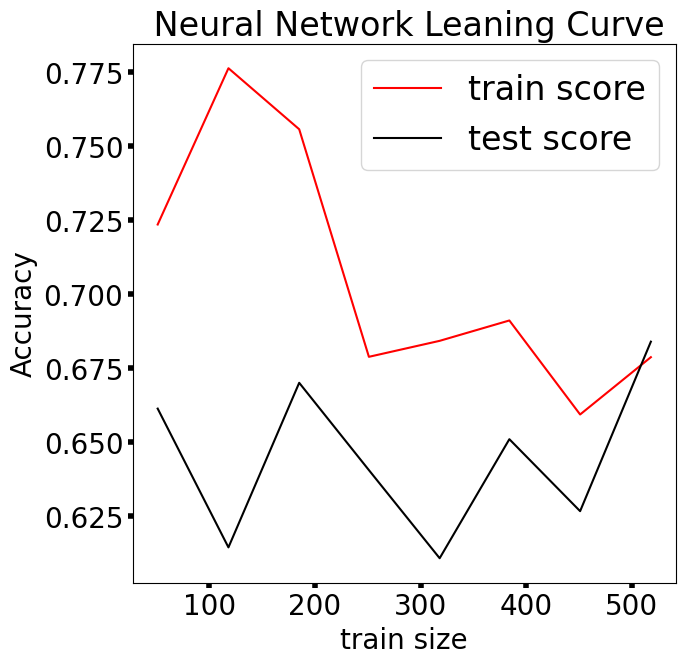

In [ ]:
train_sizes=np.linspace(0.1,1.0,8)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(NNmodel_1, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
plt.figure()
train_score_mean=train_score.mean(axis=1)
test_score_mean=valid_score.mean(axis=1)
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Neural Network Leaning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

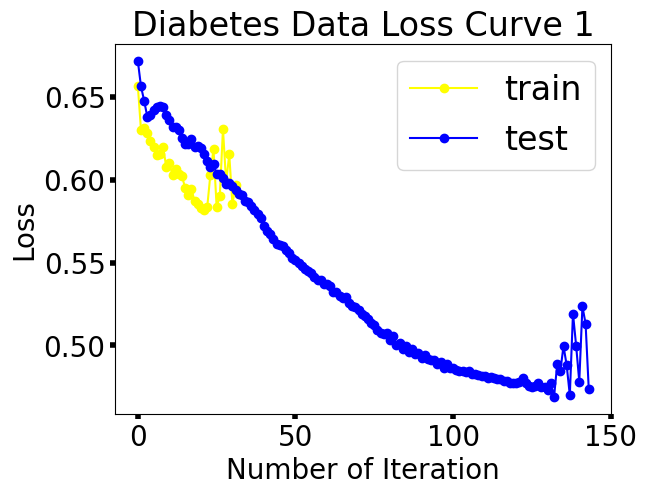

In [ ]:
plt.figure()
NNmodel_1.fit(x_train,y_train)
train_loss=NNmodel_1.loss_curve_
plt.plot(train_loss,'o-',color="yellow",label='train')
NNmodel_1.fit(x_test,y_test)
test_loss=NNmodel_1.loss_curve_
plt.plot(test_loss, 'o-',color="blue",label="test")
plt.title("Diabetes Data Loss Curve 1", fontsize=24)
plt.xlabel("Number of Iteration",fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend(loc='best',fontsize=24)
plt.tick_params(labelsize=20,width=4)

In [ ]:
learning_rates=[0.001,0.002,0.003,0.004,0.005,0.01,0.02,0.03,0.04]
hsize=[1,2,3,4,5,6,7,8,9,10]
param_grid={'hidden_layer_sizes':hsize,'learning_rate_init': learning_rates,'activation':['tanh','relu'], 'solver':['sgd','adam'], 'learning_rate':['constant','adaptive']}
nngrid_2=GridSearchCV(estimator=MLPClassifier(random_state=42),param_grid=param_grid, cv=10, n_jobs=-1)
nngrid_2.fit(x_train, y_train)
NNmodel_2=nngrid_2.best_estimator_
dump(NNmodel_2,"nnmodel2.joblib")
estimator=load("nnmodel2.joblib")
print("best estimator",estimator)
NNmodel_2.fit(x_train,y_train)
y_train_prediction=NNmodel_2.predict(x_train)
y_test_prediction=NNmodel_2.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(NNmodel_2,X,y,cv=5).mean()
std_cv=np.std(cross_val_score(NNmodel_2,X,y,cv=5))
print(f'Cross Validation Score {cross_validation_score}')
print(f'std of cross validation score {std_cv}')

best estimator MLPClassifier(hidden_layer_sizes=6, learning_rate_init=0.04, random_state=42)
Train score 0.7482638888888888
Test score 0.765625
Cross Validation Score 0.7122740005092947
std of cross validation score 0.02108356733923832


<Figure size 640x480 with 0 Axes>

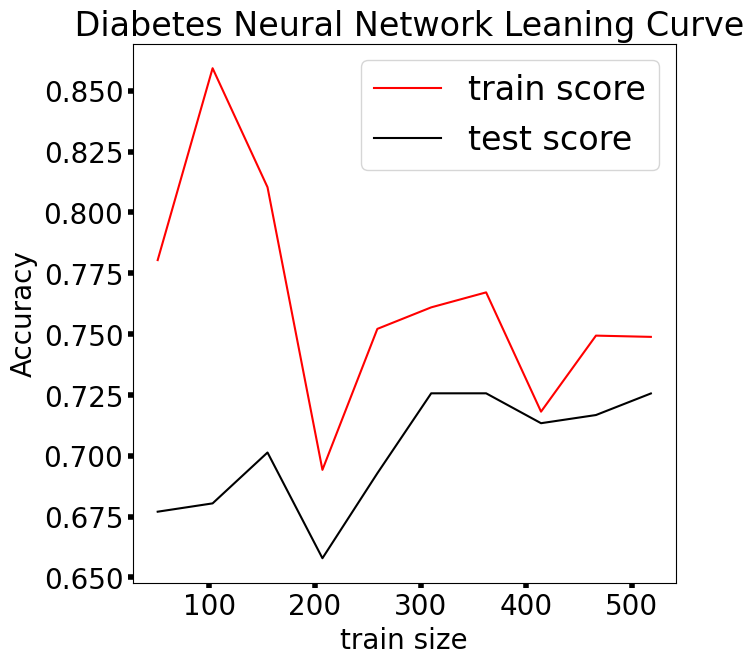

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(NNmodel_2, x_train, y_train, train_sizes=train_sizes,  n_jobs=-1, return_times=True, scoring="accuracy", cv=10)
plt.figure()
train_score_mean=train_score.mean(axis=1)
nn_test_score_mean=valid_score.mean(axis=1)
nn_fit_score_mean=np.mean(fit_times, axis=1)
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, nn_test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Diabetes Neural Network Leaning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


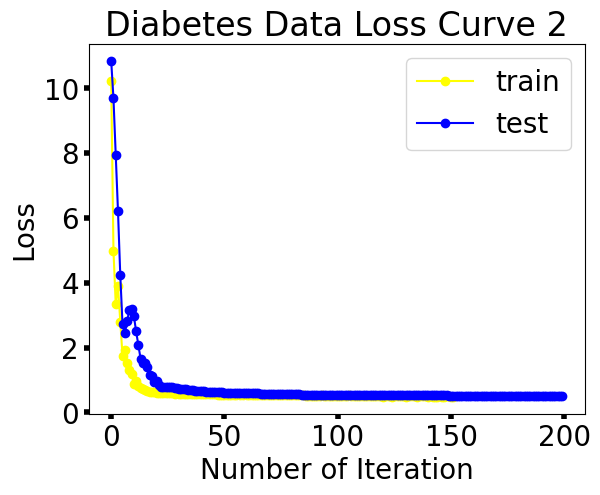

In [ ]:
plt.figure()
NNmodel_2.fit(x_train,y_train)
train_loss=NNmodel_2.loss_curve_
plt.plot(train_loss,'o-',color="yellow",label="train")
NNmodel_2.fit(x_test,y_test)
test_loss=NNmodel_2.loss_curve_
plt.plot(test_loss, 'o-',color="blue", label="test")
plt.title("Diabetes Data Loss Curve 2", fontsize=24)
plt.xlabel("Number of Iteration",fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend(loc="best",fontsize=20)
plt.tick_params(labelsize=20,width=4)

# **Support Vector Machine SVM**

Accuracy Score:  0.7291666666666666
Precision Score:  0.6197183098591549
Recall Score:  0.6376811594202898


<Figure size 640x480 with 0 Axes>

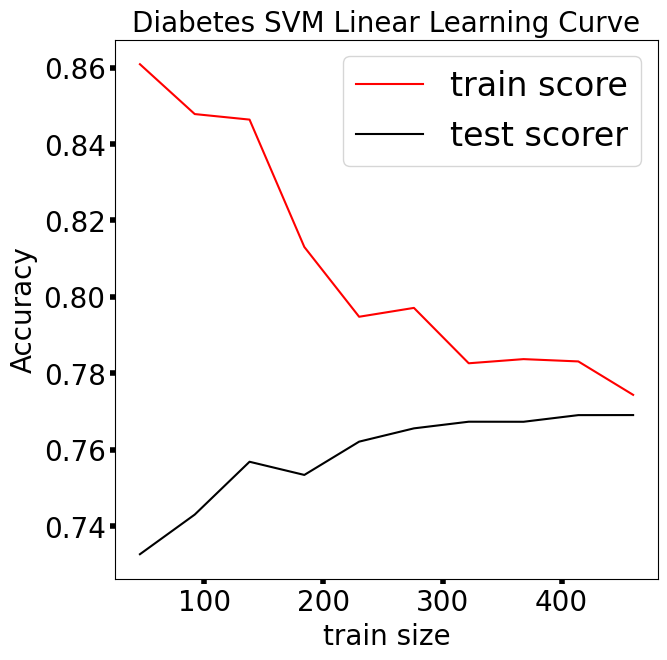

In [ ]:
#Support Vector Machine SVM
clf_linear=svm.SVC(kernel='linear',random_state=42)
clf_linear.fit(x_train, y_train)
y_prediction=clf_linear.predict(x_test)
accuracy_linear= accuracy_score (y_test,y_prediction)
precision_linear=precision_score(y_test,y_prediction)
recall_linear=recall_score(y_test,y_prediction)
print("Accuracy Score: ", accuracy_linear)
print("Precision Score: ", precision_linear)
print("Recall Score: ", recall_linear)

train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf_linear, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test scorer", color="black")
plt.legend(loc="best",fontsize=24)
plt.title("Diabetes SVM Linear Learning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


Accuracy Score:  0.7291666666666666
Precision Score:  0.6666666666666666
Recall Score:  0.4927536231884058


<Figure size 640x480 with 0 Axes>

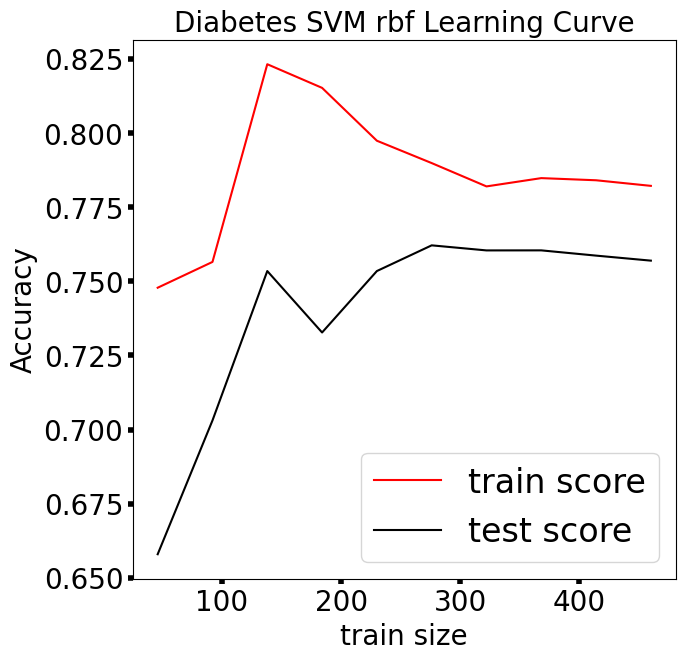

In [ ]:
#souce of code: https://www.geeksforgeeks.org/support-vector-machine-algorithm/
from sklearn.inspection import DecisionBoundaryDisplay
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
clf_rbf=svm.SVC(kernel='rbf', random_state=42)
clf_rbf.fit(x_train, y_train)
y_prediction=clf_rbf.predict(x_test)
accuracy_rbf= accuracy_score (y_test,y_prediction)
precision_rbf=precision_score(y_test,y_prediction)
recall_rbf=recall_score(y_test,y_prediction)
print("Accuracy Score: ", accuracy_rbf)
print("Precision Score: ", precision_rbf)
print("Recall Score: ", recall_rbf)

train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf_rbf, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title("Diabetes SVM rbf Learning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


Accuracy Score:  0.734375
Precision Score:  0.6666666666666666
Recall Score:  0.5217391304347826


<Figure size 640x480 with 0 Axes>

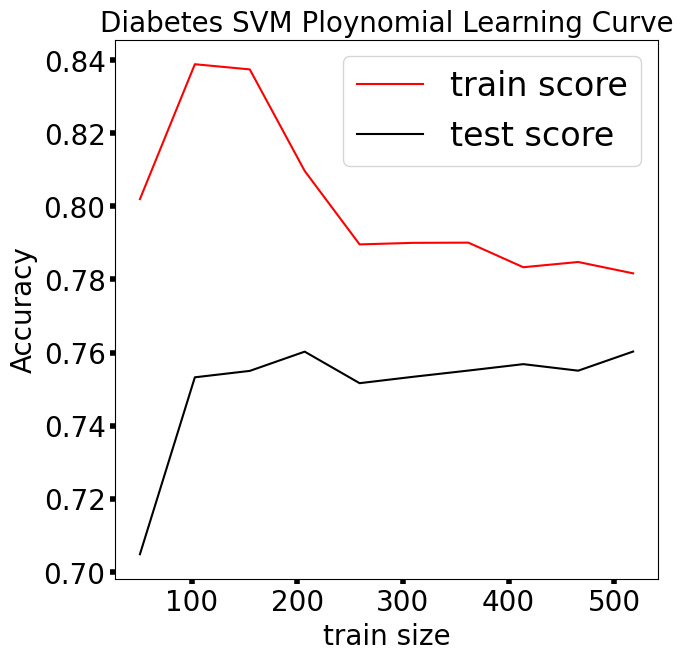

In [ ]:
clf_poly=svm.SVC(kernel='poly', random_state=42)
clf_poly.fit(x_train, y_train)
y_prediction=clf_poly.predict(x_test)
accuracy_poly= accuracy_score (y_test,y_prediction)
precision_poly=precision_score(y_test,y_prediction)
recall_poly=recall_score(y_test,y_prediction)
print("Accuracy Score: ", accuracy_poly)
print("Precision Score: ", precision_poly)
print("Recall Score: ", recall_poly)
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf_poly, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
train_score_mean=np.mean(train_score, axis=1)
train_std=np.std(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
test_std=np.std(valid_score, axis=1)
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title("Diabetes SVM Ploynomial Learning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


Accuracy Score:  0.5520833333333334
Precision Score:  0.2926829268292683
Recall Score:  0.17391304347826086


<Figure size 640x480 with 0 Axes>

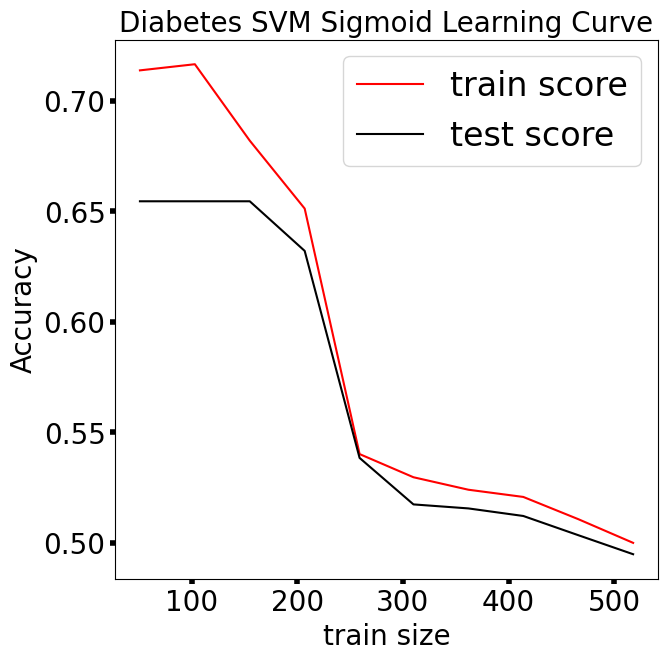

In [ ]:
clf_sigmoid=svm.SVC(kernel='sigmoid', random_state=42)
clf_sigmoid.fit(x_train, y_train)
y_prediction=clf_sigmoid.predict(x_test)
accuracy_sigmoid= accuracy_score (y_test,y_prediction)
precision_sigmoid=precision_score(y_test,y_prediction)
recall_sigmoid=recall_score(y_test,y_prediction)
print("Accuracy Score: ", accuracy_sigmoid)
print("Precision Score: ", precision_sigmoid)
print("Recall Score: ", recall_sigmoid)
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf_sigmoid, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title("Diabetes SVM Sigmoid Learning Curve",fontsize=20)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fontsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


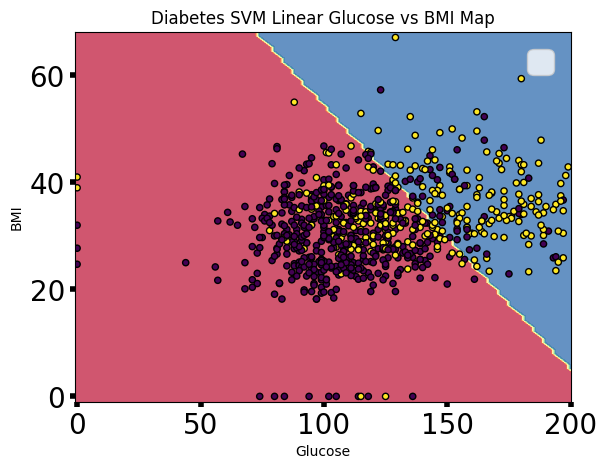

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fontsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


accuracy score linear 0.75


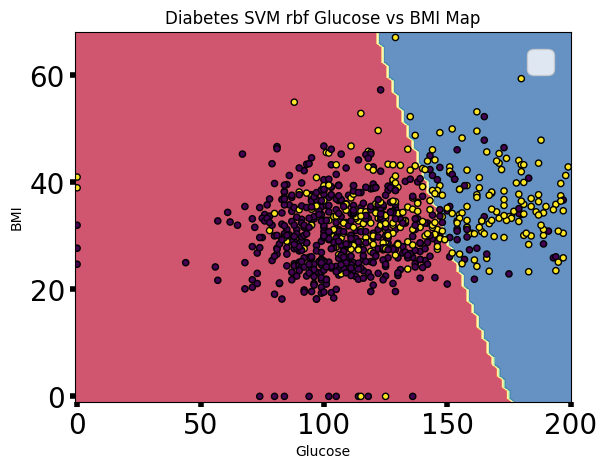

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fontsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


accuracy score rbf 0.7291666666666666


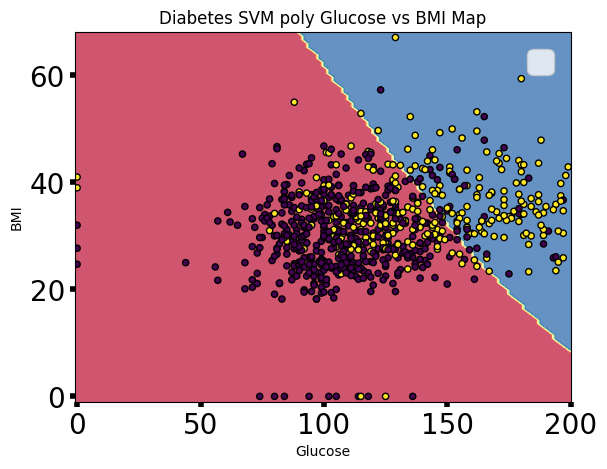

accuracy score poly 0.7447916666666666


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fontsize'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


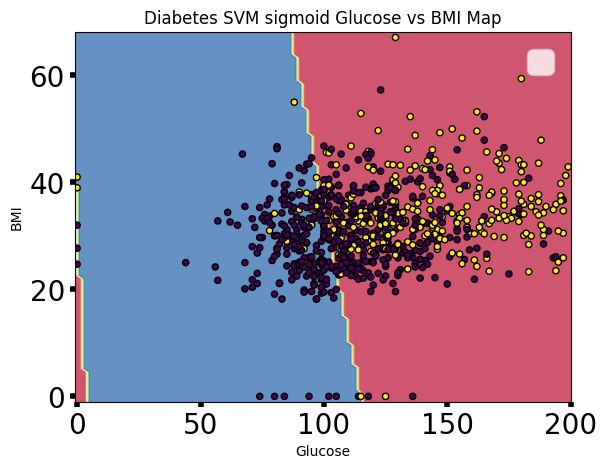

accuracy score sigmoid 0.3958333333333333


In [ ]:
print(df.head())
X_map=df[['Glucose','BMI']]
x_train,x_test,y_train,y_test=train_test_split(X_map,y,test_size=0.25, random_state=42)

clf_linear=svm.SVC(kernel='linear')
clf_linear.fit(x_train, y_train)
DecisionBoundaryDisplay.from_estimator(clf_linear,x_train,response_method='predict',cmap=plt.cm.Spectral, alpha=0.8, xlabel="Glucose",ylabel='BMI',fontsize=20)
plt.scatter(X_map['Glucose'],X_map['BMI'], c=y, s=20, edgecolors="k")
plt.legend(loc="best",fontsize=24)
plt.tick_params(labelsize=20,width=4)
plt.title("Diabetes SVM Linear Glucose vs BMI Map")
plt.show()
y_prediction=clf_linear.predict(x_test)
accuracy_linear= accuracy_score (y_test,y_prediction)
print("accuracy score linear",accuracy_linear)

clf_rbf=svm.SVC(kernel='rbf')
clf_rbf.fit(x_train, y_train)
DecisionBoundaryDisplay.from_estimator(clf_rbf,x_train,response_method='predict',cmap=plt.cm.Spectral, alpha=0.8, xlabel="Glucose",ylabel='BMI',fontsize=20)
plt.scatter(X_map['Glucose'],X_map['BMI'], c=y, s=20, edgecolors="k")
plt.legend(loc="best",fontsize=24)
plt.tick_params(labelsize=20,width=4)
plt.title("Diabetes SVM rbf Glucose vs BMI Map")
plt.show()
y_prediction=clf_rbf.predict(x_test)
accuracy_rbf= accuracy_score (y_test,y_prediction)
print("accuracy score rbf",accuracy_rbf)

clf_poly=svm.SVC(kernel='poly')
clf_poly.fit(x_train, y_train)
DecisionBoundaryDisplay.from_estimator(clf_poly,x_train,response_method='predict',cmap=plt.cm.Spectral, alpha=0.8, xlabel="Glucose",ylabel='BMI',fontsize=20)
plt.scatter(X_map['Glucose'],X_map['BMI'], c=y, s=20, edgecolors="k")
plt.legend(loc="best",fontsize=24)
plt.tick_params(labelsize=20,width=4)
plt.title("Diabetes SVM poly Glucose vs BMI Map")
plt.show()
y_prediction=clf_poly.predict(x_test)
accuracy_poly= accuracy_score (y_test,y_prediction)
print("accuracy score poly",accuracy_poly)

clf_sigmoid=svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(x_train, y_train)
DecisionBoundaryDisplay.from_estimator(clf_sigmoid,x_train,response_method='predict',cmap=plt.cm.Spectral, alpha=0.8, xlabel="Glucose",ylabel='BMI',fontsize=20)
plt.scatter(X_map['Glucose'],X_map['BMI'], c=y, s=20, edgecolors="k")
plt.legend(loc="best",fontsize=24)
plt.tick_params(labelsize=20,width=4)
plt.title("Diabetes SVM sigmoid Glucose vs BMI Map")
plt.show()
y_prediction=clf_sigmoid.predict(x_test)
accuracy_sigmoid= accuracy_score (y_test,y_prediction)
print("accuracy score sigmoid",accuracy_sigmoid)

In [ ]:
param_grid={'C':[0.1,1,10,100,1000],"gamma":[1,0.1,0.001,0.0001],'kernel':['linear','rnf','polynomial','signomoid']}
svmgrid=GridSearchCV(svm.SVC(random_state=42),param_grid,refit=True,verbose=3, n_jobs=-1)
svmgrid.fit(x_train, y_train)
svmmodel=svmgrid.best_estimator_
dump(svmmodel,"model.joblib")
estimator=load("model.joblib")
print("best estimator",estimator)
svmmodel.fit(x_train,y_train)
y_train_prediction=svmmodel.predict(x_train)
y_test_prediction=svmmodel.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(svmmodel,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_par

best estimator SVC(C=1, gamma=1, kernel='linear', random_state=42)
Train score 0.7690972222222222
Test score 0.75
Cross Validation Score 0.7656820303879128


<Figure size 640x480 with 0 Axes>

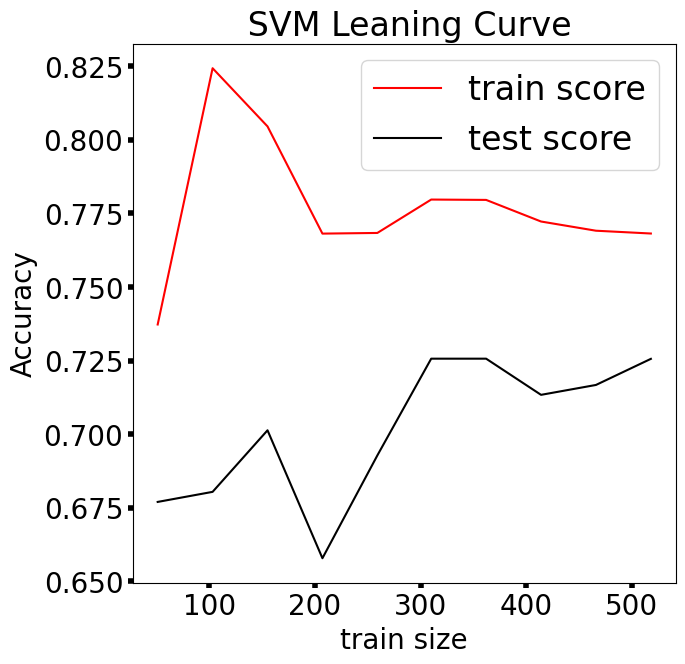

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(svmmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
plt.figure()
train_score_mean=train_score.mean(axis=1)
svm_test_score_mean=valid_score.mean(axis=1)
svm_fit_score_mean=np.mean(fit_times, axis=1)

plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, nn_test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" SVM Leaning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
# source of code: https://realpython.com/knn-python/

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
train_prediction=knn.predict(x_train)
mse=mean_squared_error(y_train,train_prediction)
rmse_train=sqrt(mse)
print("rmse_train",rmse_train)

test_prediction=knn.predict(x_test)
mse=mean_squared_error(y_test,test_prediction)
rmse_test=sqrt(mse)
print("rmse_test",rmse_test)


rmse_train 0.3930825471690252
rmse_test 0.5400617248673217


Train score 0.8125
Test score 0.7239583333333334
Cross Validation Score 0.723979288685171


<Figure size 640x480 with 0 Axes>

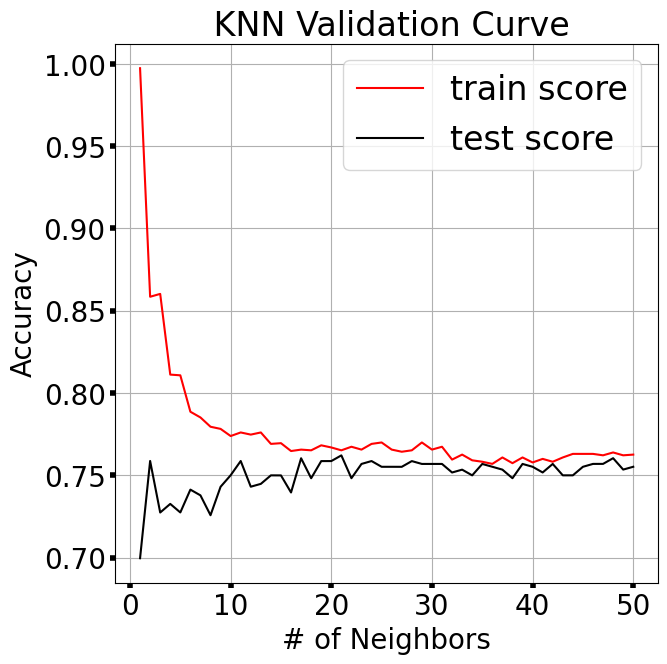

In [ ]:

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_train_prediction=knn.predict(x_train)
y_test_prediction=knn.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(knn,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

n_neighbors=np.arange(50)+1
train_score, valid_score=validation_curve(knn, x_train, y_train, param_name="n_neighbors", param_range=depth_range, cv=5, n_jobs=4, scoring='accuracy')
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(n_neighbors, train_score_mean, label="train score", color="red")
plt.plot(n_neighbors, test_score_mean, label="test score", color="black")
plt.legend()
plt.title(" KNN Validation Curve", fontsize=24)
plt.xlabel("# of Neighbors",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.legend(loc="best",fontsize=24)
plt.tick_params(labelsize=20,width=4)
plt.grid()
plt.show()

Train score 0.7829861111111112
Test score 0.7552083333333334
Cross Validation Score 0.7383668618962738


<Figure size 640x480 with 0 Axes>

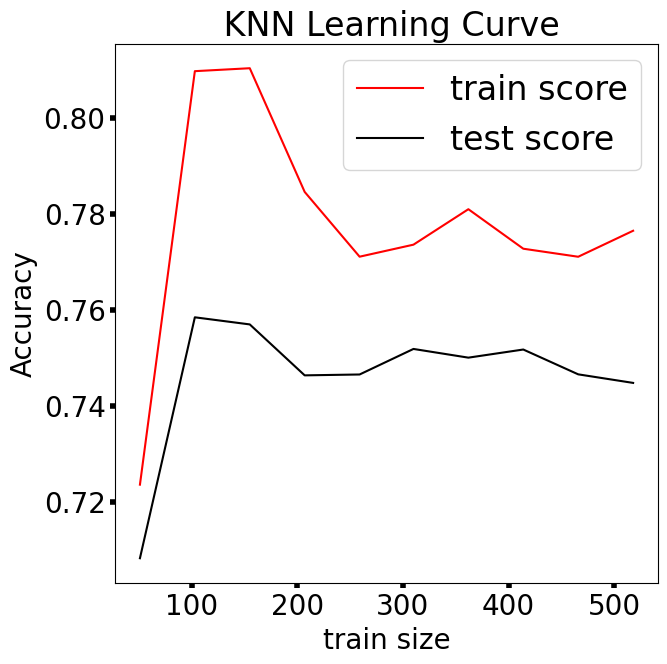

In [ ]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_train_prediction=knn.predict(x_train)
y_test_prediction=knn.predict(x_test)

print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(knn,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(knn, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" KNN Learning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


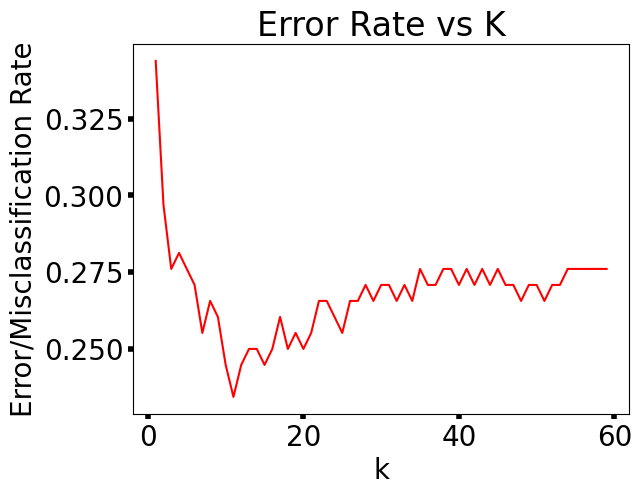

In [ ]:
error=[]
for i in range(1,60):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_test_prediction=knn.predict(x_test)
  error.append(np.mean(y_test_prediction !=y_test))
plt.figure()
plt.plot(range(1,60),error,color="red")
plt.title("Error Rate vs K", fontsize=24)
plt.xlabel("k", fontsize=20)
plt.ylabel("Error/Misclassification Rate",fontsize=20)
plt.tick_params(labelsize=20,width=4)

In [ ]:
parameters={"n_neighbors": range(1,20),'weights':['uniform','distance'],'metric':['minkowski','euclidean','manhattan','cosine','jaccard','hamming']}
gridsearch=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parameters, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
gridsearch.fit(x_train, y_train)

knnmodel=gridsearch.best_estimator_
dump(knnmodel,"model.joblib")
estimator=load("model.joblib")
print("best estimator",estimator)
knnmodel.fit(x_train,y_train)
y_train_prediction=knnmodel.predict(x_train)
y_test_prediction=knnmodel.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(knnmodel,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')
mse=mean_squared_error(y_train,y_train_prediction)
rmse_train=sqrt(mse)
print("rmse_train",rmse_train)
mse=mean_squared_error(y_test,y_test_prediction)
rmse_test=sqrt(mse)
print("rmse_test",rmse_test)


Fitting 10 folds for each of 228 candidates, totalling 2280 fits
best estimator KNeighborsClassifier(metric='cosine', n_neighbors=10)
Train score 0.7829861111111112
Test score 0.7291666666666666
Cross Validation Score 0.6810287751464222
rmse_train 0.4658474953124562
rmse_test 0.5204164998665332


<Figure size 640x480 with 0 Axes>

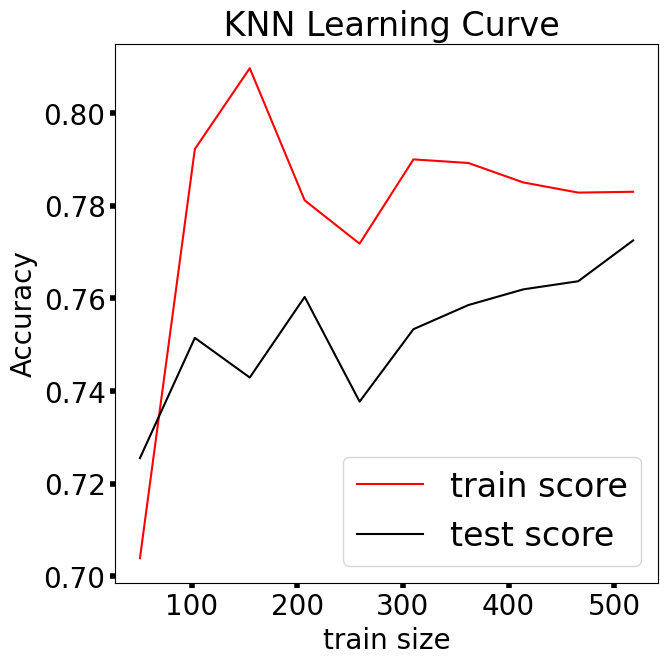

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(knnmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=10)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" KNN Learning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()


# **AdaBoosting**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf=AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=50,random_state=42)
clf.fit(x_train,y_train)
y_train_prediction=clf.predict(x_train)
y_test_prediction=clf.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(clf,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')


Train score 0.7951388888888888
Test score 0.7291666666666666
Cross Validation Score 0.7631270690094218


<Figure size 640x480 with 0 Axes>

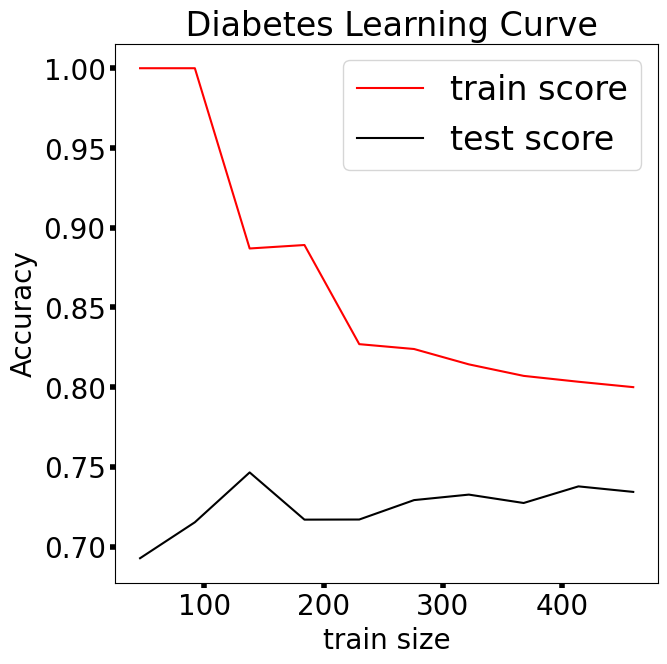

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(clf, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5,random_state=42)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Diabetes Learning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

best number estimator 33


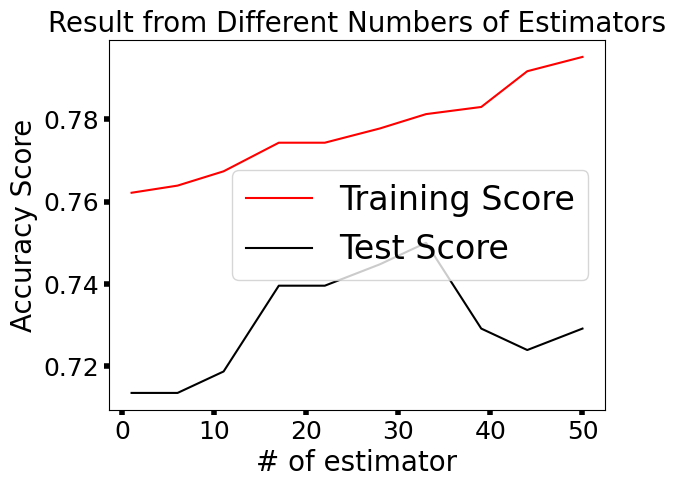

In [ ]:
n_estimators=np.linspace(1,50,10).astype('int')
train_score=[]
test_score=[]
for i in n_estimators:
  boosting=AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=i,random_state=42)
  boosting.fit(x_train, y_train)
  predict_train=boosting.predict(x_train)
  predict_test=boosting.predict(x_test)
  accuracy_train_score=accuracy_score(y_train,predict_train)
  accuracy_test_score=accuracy_score(y_test, predict_test)
  train_score.append(accuracy_train_score)
  test_score.append(accuracy_test_score)
best_index_boosting=np.argmax(test_score)
best_estimator=n_estimators[best_index_boosting]
print("best number estimator",best_estimator)

plt.figure()
plt.plot(n_estimators, train_score, label="Training Score", color="red")
plt.plot(n_estimators, test_score, label="Test Score", color="black")
plt.title("Result from Different Numbers of Estimators", fontsize=20)
plt.xlabel("# of estimator",fontsize=20)
plt.ylabel("Accuracy Score",fontsize=20)
plt.legend(loc='best',fontsize=24)
plt.tick_params(labelsize=18,width=4)
plt.show()

In [ ]:
parameters={"n_estimators": range(1,40), 'learning_rate': [0.96,0.97,0.98,0.99,1],'algorithm':['SAMME','SAMME.R']}
gridsearch_boosting=GridSearchCV(AdaBoostClassifier(random_state=42), parameters, cv=10, n_jobs=-1, scoring='accuracy')
gridsearch_boosting.fit(x_train, y_train)
boostingmodel=gridsearch_boosting.best_estimator_
dump(boostingmodel,"boostingmodel.joblib")
estimator=load("boostingmodel.joblib")
print("best estimator",estimator)
boostingmodel.fit(x_train,y_train)
y_train_prediction=boostingmodel.predict(x_train)
y_test_prediction=boostingmodel.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(boostingmodel,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')
mse=mean_squared_error(y_train,y_train_prediction)
rmse_train=sqrt(mse)
print("rmse_train",rmse_train)
mse=mean_squared_error(y_test,y_test_prediction)
rmse_test=sqrt(mse)
print("rmse_test",rmse_test)

best estimator AdaBoostClassifier(learning_rate=0.97, n_estimators=38, random_state=42)
Train score 0.7777777777777778
Test score 0.75
Cross Validation Score 0.7631100925218572
rmse_train 0.4714045207910317
rmse_test 0.5


<Figure size 640x480 with 0 Axes>

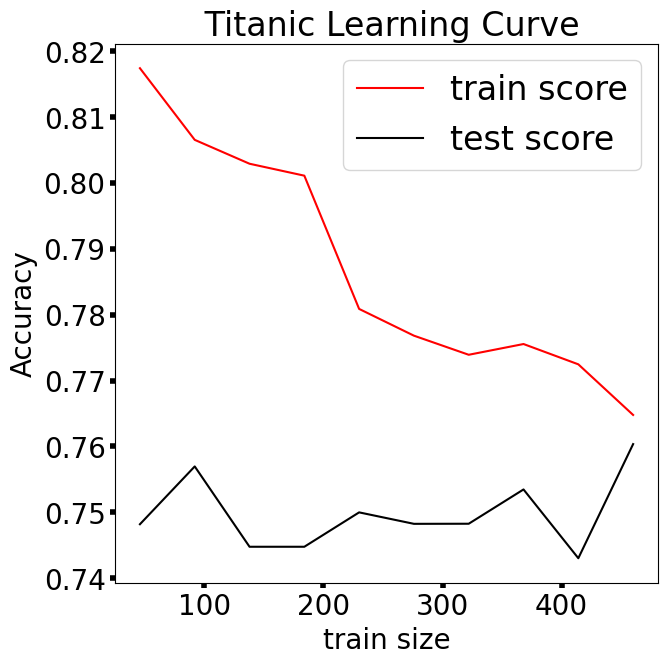

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(boostingmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
boosting_test_score_mean=np.mean(valid_score, axis=1)
boosting_fit_score_mean=np.mean(fit_times,axis=1)
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, boosting_test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Titanic Learning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model=GradientBoostingClassifier(n_estimators=5, learning_rate =0.5)
gradient_boosting_model.fit(x_train,y_train)
y_train_prediction=clf.predict(x_train)
y_test_prediction=clf.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(clf,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')

Train score 0.7951388888888888
Test score 0.7291666666666666
Cross Validation Score 0.7631270690094218


<Figure size 640x480 with 0 Axes>

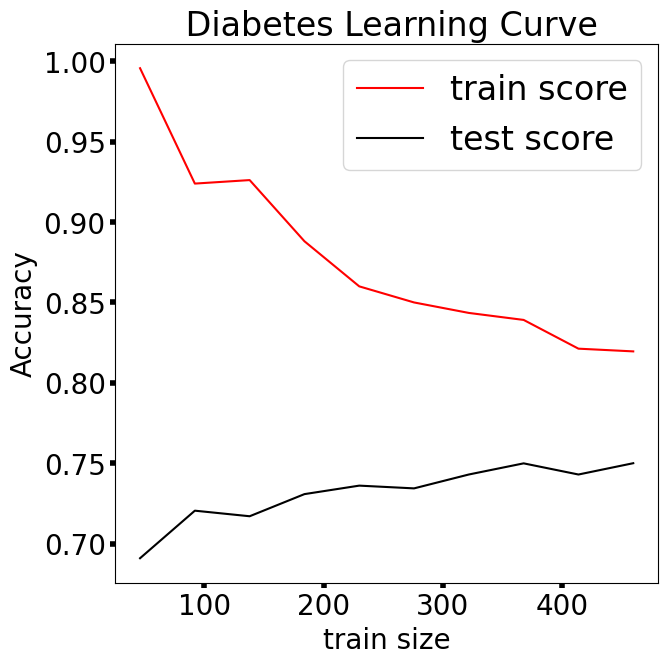

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(gradient_boosting_model, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5,random_state=42)
train_score_mean=np.mean(train_score, axis=1)
test_score_mean=np.mean(valid_score, axis=1)

plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Diabetes Learning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

best number estimator 6


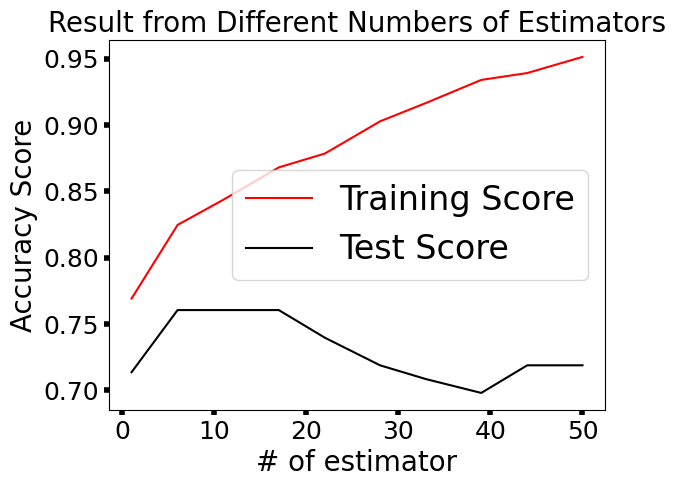

In [ ]:
n_estimators=np.linspace(1,50,10).astype('int')
train_score=[]
test_score=[]
for i in n_estimators:
  boosting=GradientBoostingClassifier(learning_rate=0.5, n_estimators=i,random_state=42)
  boosting.fit(x_train, y_train)
  predict_train=boosting.predict(x_train)
  predict_test=boosting.predict(x_test)
  accuracy_train_score=accuracy_score(y_train,predict_train)
  accuracy_test_score=accuracy_score(y_test, predict_test)
  train_score.append(accuracy_train_score)
  test_score.append(accuracy_test_score)
best_index_boosting=np.argmax(test_score)
best_estimator=n_estimators[best_index_boosting]
print("best number estimator",best_estimator)

plt.figure()
plt.plot(n_estimators, train_score, label="Training Score", color="red")
plt.plot(n_estimators, test_score, label="Test Score", color="black")
plt.title("Result from Different Numbers of Estimators", fontsize=20)
plt.xlabel("# of estimator",fontsize=20)
plt.ylabel("Accuracy Score",fontsize=20)
plt.legend(loc='best',fontsize=24)
plt.tick_params(labelsize=18,width=4)
plt.show()

In [ ]:
# parameters={"n_estimators": range(1,40), 'learning_rate': [(0.96+x/100) for x in range(0,8)]}
parameters={"n_estimators": range(1,40), 'learning_rate': [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gridsearch_boosting=GridSearchCV(GradientBoostingClassifier(random_state=42), parameters, cv=10, n_jobs=-1, scoring='accuracy')
gridsearch_boosting.fit(x_train, y_train)
gradientboostingmodel=gridsearch_boosting.best_estimator_
dump(gradientboostingmodel,"gradientboostingmodel.joblib")
estimator=load("gradientboostingmodel.joblib")
print("best estimator",estimator)
boostingmodel.fit(x_train,y_train)
y_train_prediction=gradientboostingmodel.predict(x_train)
y_test_prediction=gradientboostingmodel.predict(x_test)
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')
cross_validation_score=cross_val_score(gradientboostingmodel,X,y,cv=5).mean()
print(f'Cross Validation Score {cross_validation_score}')
mse=mean_squared_error(y_train,y_train_prediction)
rmse_train=sqrt(mse)
print("rmse_train",rmse_train)
mse=mean_squared_error(y_test,y_test_prediction)
rmse_test=sqrt(mse)
print("rmse_test",rmse_test)

best estimator GradientBoostingClassifier(learning_rate=0.6, n_estimators=4, random_state=42)
Train score 0.8125
Test score 0.7604166666666666
Cross Validation Score 0.7512944571768101
rmse_train 0.4330127018922193
rmse_test 0.48947250518628044


<Figure size 640x480 with 0 Axes>

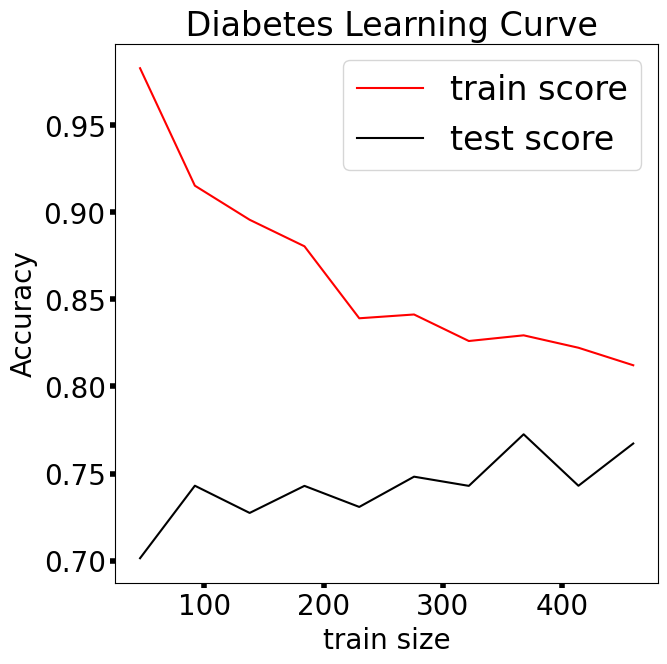

In [ ]:
train_sizes=np.linspace(0.1,1.0,10)
train_sizes, train_score, valid_score, fit_times, _ =learning_curve(gradientboostingmodel, x_train, y_train, train_sizes=train_sizes,  n_jobs=4, return_times=True, scoring="accuracy", cv=5)
train_score_mean=np.mean(train_score, axis=1)
boosting_test_score_mean=np.mean(valid_score, axis=1)
boosting_fit_score_mean=np.mean(fit_times,axis=1)
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes, train_score_mean, label="train score", color="red")
plt.plot(train_sizes, boosting_test_score_mean, label="test score", color="black")
plt.legend(loc="best",fontsize=24)
plt.title(" Diabetes Learning Curve",fontsize=24)
plt.xlabel("train size",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.tick_params(labelsize=20,width=4)
plt.show()

# **Model Comparison**

<Figure size 640x480 with 0 Axes>

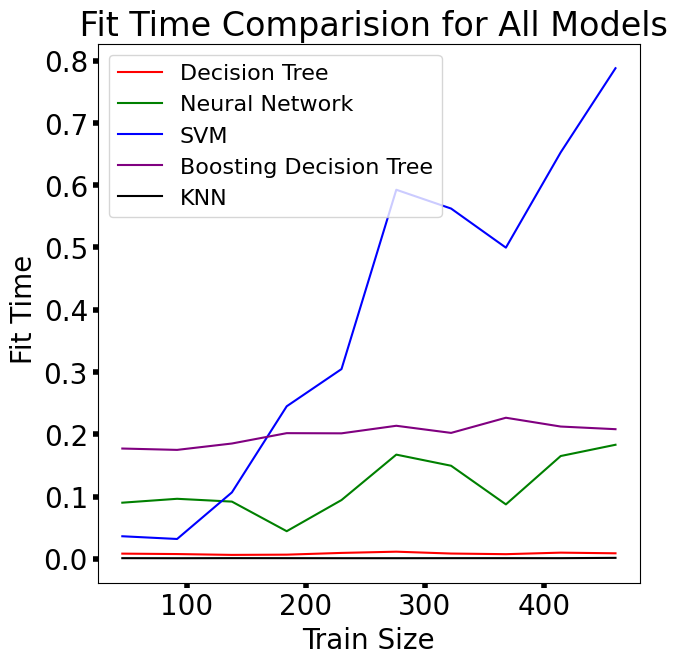

In [ ]:
plt.figure()
plt.subplots(1,figsize=(7,7))
plt.plot(train_sizes,dt_fit_score_mean,label="Decision Tree",color="red")
plt.plot(train_sizes,nn_fit_score_mean,label="Neural Network",color="green")
plt.plot(train_sizes,svm_fit_score_mean,label="SVM",color="blue")
plt.plot(train_sizes,boosting_fit_score_mean,label="Boosting Decision Tree",color="purple")
plt.plot(train_sizes,knn_fit_score_mean,label="KNN",color="black")

plt.title(" Fit Time Comparision for All Models",fontsize=24)
plt.xlabel("Train Size",fontsize=20)
plt.ylabel(" Fit Time",fontsize=20)
plt.legend(loc="best", fontsize=16)
plt.tick_params(labelsize=20,width=4)
plt.show()

<Figure size 640x480 with 0 Axes>

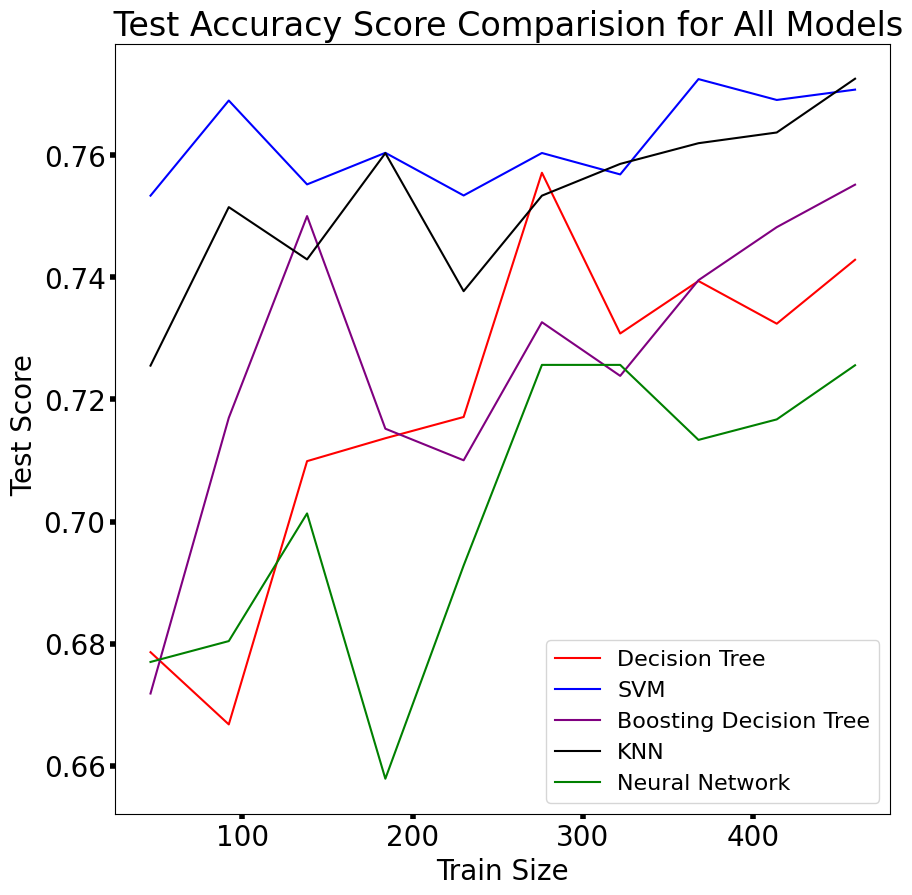

In [ ]:
plt.figure()
plt.subplots(1,figsize=(10,10))

plt.plot(train_sizes,dt_test_score_mean,label="Decision Tree",color="red")
plt.plot(train_sizes,svm_test_score_mean,label="SVM",color="blue")
plt.plot(train_sizes,boosting_test_score_mean,label="Boosting Decision Tree",color="purple")
plt.plot(train_sizes,knn_test_score_mean,label="KNN",color="black")
plt.plot(train_sizes,nn_test_score_mean,label="Neural Network",color="green")

plt.title(" Test Accuracy Score Comparision for All Models",fontsize=24)
plt.xlabel("Train Size",fontsize=20)
plt.ylabel(" Test Score",fontsize=20)
# plt.ylim(0.56,0.82)
plt.legend(loc="best", fontsize=16)
plt.tick_params(labelsize=20,width=4)
plt.show()